THIS GOOGLE COLAB NOTEBOOK IS PRIMARILY FOR DATA CLEANING AND EDA IN THE UNSUPERVISED EDSA PREDICT

# MOUNTING GOOGLE DRIVE TO COLAB NOTEBOOK

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# IMPORTING PACKAGES

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

# READING IN CSV FILES AND INITIAL FILE INSPECTION:

In [104]:
df_sample_submission = pd.read_csv('/content/drive/My Drive/ColabNotebooks/sample_submission.csv')
df_movies = pd.read_csv('/content/drive/My Drive/ColabNotebooks/movies.csv')
df_imdb = pd.read_csv('/content/drive/My Drive/ColabNotebooks/imdb_data.csv')
df_genome_scores = pd.read_csv('/content/drive/My Drive/ColabNotebooks/genome_scores.csv')
df_genome_tags = pd.read_csv('/content/drive/My Drive/ColabNotebooks/genome_tags.csv')
df_train = pd.read_csv('/content/drive/My Drive/ColabNotebooks/train.csv')
df_test = pd.read_csv('/content/drive/My Drive/ColabNotebooks/test.csv')
df_tags = pd.read_csv('/content/drive/My Drive/ColabNotebooks/tags.csv')
df_links = pd.read_csv('/content/drive/My Drive/ColabNotebooks/links.csv')

MOVIES DATAFRAME:

In [105]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [106]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [107]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

IMDB DATAFRAME:

In [108]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [109]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [110]:
df_imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

GENOME_SCORES DATAFRAME:

In [111]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [112]:

df_genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [113]:
df_genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

GENOME_TAGS DATAFRAME:

In [114]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [115]:
df_genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [116]:
df_genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

TRAIN DATAFRAME:

In [117]:
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [118]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [119]:
df_train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

TEST DATAFRAME:

In [120]:
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [121]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [122]:
df_test.isnull().sum()

userId     0
movieId    0
dtype: int64

TAGS DATAFRAME:

In [123]:
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [124]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [125]:
df_tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

LINKS DATAFRAME:

In [126]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [127]:
df_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [128]:
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

# DATA CLEANING: PRIMARILY FOCUSED ON THE IMDB AND MOVIES DATAFRAME:

In [129]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


THE TITLE COLUMN WILL NOW TO SPLIT INTO A COLUMN CONTAINING THE TITLE AND A SEPERATE, NEW COLUMN CONTAINING THE YEAR THAT THE MOVIES WAS RELEASED.

In [130]:
titles = []
years = []

for t in df_movies.title:
  split = t.split("(")
  titles.append(split[0])
  years.append(split[-1])

df_movies['title'] = titles
df_movies['year'] = years

df_movies.head()



,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995)
1,2,Jumanji,Adventure|Children|Fantasy,1995)
2,3,Grumpier Old Men,Comedy|Romance,1995)
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995)
4,5,Father of the Bride Part II,Comedy,1995)


In [131]:
df_movies['year'] = df_movies.year.str.extract("(\d+)")
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [132]:
df_movies.year.value_counts()

2015    2513
2016    2488
2014    2406
2017    2375
2013    2174
        ... 
1874       1
3          1
101        1
1878       1
1883       1
Name: year, Length: 149, dtype: int64

FROM HERE, WE WISH TO CREATE A SEPERATE ROW FOR EACH SPECIFIC GENRE GROUP.

In [133]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(df_movies[['movieId', 'genres']],
                             columns=['movieId', 'genres',])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


FOLLOWED BY MERGING THE YEAR COLUMN INTO THIS NEW DATAFRAME:

In [134]:
movies_genres = pd.merge(movies_genres, df_movies[['movieId','title', 'year']], on='movieId', how='left')
movies_genres.head()

,movieId,genres,title,year
0,1,Adventure,Toy Story,1995
1,1,Animation,Toy Story,1995
2,1,Children,Toy Story,1995
3,1,Comedy,Toy Story,1995
4,1,Fantasy,Toy Story,1995


In [135]:
movies = movies_genres.copy()

In [136]:
movies.isnull().sum()

movieId      0
genres       0
title        0
year       465
dtype: int64

In [137]:
movies.shape

(112307, 4)

## CLEANING THE IMDB DATAFRAME:

In [138]:
np.array(df_imdb['budget'].unique())

array(['$30,000,000', '$65,000,000', '$25,000,000', ..., 'DKK35,000,000',
       'EUR90,000', 'DEM5,800,000'], dtype=object)

WE WISH TO REMOVE CURRENCY SYMBOLS/CODES BEFORE FROM THE BUDGET COLUMN. PLACING THESE BUDGET SYMBOLS INTO A NEW COLUMN WILL ENABLE US TO CONVERT ALL BUDGETS INTO DOLLARS LATER ON:

In [139]:
df_imdb['budget'] = df_imdb['budget'].str.replace(r'$', 'USD')

In [140]:
df_imdb['currency'] = df_imdb['budget'].str.extract(r'([a-zA-Z]*)')

In [141]:
df_imdb['budget'] = df_imdb['budget'].str.replace(r'[a-zA-Z]', '')

In [142]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,currency
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"30,000,000",toy|rivalry|cowboy|cgi animation,USD
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"65,000,000",board game|adventurer|fight|game,USD
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"25,000,000",boat|lake|neighbor|rivalry,USD
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"16,000,000",black american|husband wife relationship|betra...,USD
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"30,000,000",fatherhood|doberman|dog|mansion,USD


In [143]:
np.array(df_imdb['budget'].unique())

array(['30,000,000', '65,000,000', '25,000,000', '16,000,000',
       '60,000,000', '58,000,000', nan, '35,000,000', '62,000,000',
       '44,000,000', '98,000,000', '52,000,000', '4,000,000',
       '68,000,000', '30,250,000', '20,000,000', '50,000,000',
       '9,500,000', '3,600,000', '11,000,000', '18,000,000', '23,000,000',
       '29,000,001', '12,000,000', '6,000,000', '10,000,000',
       '19,000,000', '33,000,000', '55,000,000', '15,000,000',
       '3,000,000', '45,000,000', '3,800,000', '3,500,000', '9,000,000',
       '150,000', '7,000,000', '1,500,000', '4,997,987', '38,000,000',
       '47,000,000', '2,590,000', '40,000,000', '24,000,000',
       '72,000,000', '7,500,000', '5,000,000', '42,000,000', '17,000,000',
       '31,000,000', '238,000', '2,000,000', '2,300,000', '28,000,000',
       '100,000,000', '53,000,000', '27,000,000', '90,000,000',
       '26,000,000', '500,000', '1,000,000', '22,000,000', '8,000,000',
       '46,000,000', '13,000,000', '175,000,000', '2,80

In [144]:
np.array(df_imdb['currency'].unique())

array(['USD', nan, 'GBP', 'EUR', 'CAD', 'FRF', 'DEM', 'AUD', 'ISK', 'JPY',
       'HKD', 'CHF', 'ESP', 'INR', 'BEF', 'SEK', 'ATS', 'NOK', 'FIM',
       'SGD', 'DKK', 'THB', 'BRL', 'NLG', 'BND', 'CNY', 'NZD', 'HUF',
       'CZK', 'PLN', 'KRW', 'TRL', 'ZAR', 'EGP', 'BGL', 'TWD', 'IDR',
       'SIT', 'MYR', 'ILS', 'CLP', 'MXN', 'COP', 'LTL', 'ARS', 'IRR',
       'PTE', 'VEB', 'UAH', 'NGN', 'ITL', 'LVL', 'RUR', 'PHP'],
      dtype=object)

ALSO, IT IS IMPORTANT TO REMOVE THE COMMAS SEPEARTING EVERY THOUSANDTH VALUE IN THE BUDGET COLUMN IN ORDER FOR LATER ANALYSIS:

In [145]:
df_imdb['budget'] = df_imdb['budget'].str.replace(',', '')

In [146]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,currency
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,30000000,toy|rivalry|cowboy|cgi animation,USD
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,65000000,board game|adventurer|fight|game,USD
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,25000000,boat|lake|neighbor|rivalry,USD
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,16000000,black american|husband wife relationship|betra...,USD
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,30000000,fatherhood|doberman|dog|mansion,USD


In [147]:
df_imdb['title_cast'] = df_imdb['title_cast'].str.replace("|", ",")
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,currency
0,1,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",John Lasseter,81.0,30000000,toy|rivalry|cowboy|cgi animation,USD
1,2,"Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...",Jonathan Hensleigh,104.0,65000000,board game|adventurer|fight|game,USD
2,3,"Walter Matthau,Jack Lemmon,Sophia Loren,Ann-Ma...",Mark Steven Johnson,101.0,25000000,boat|lake|neighbor|rivalry,USD
3,4,"Whitney Houston,Angela Bassett,Loretta Devine,...",Terry McMillan,124.0,16000000,black american|husband wife relationship|betra...,USD
4,5,"Steve Martin,Diane Keaton,Martin Short,Kimberl...",Albert Hackett,106.0,30000000,fatherhood|doberman|dog|mansion,USD


In [148]:
cast = []

for size in df_imdb['title_cast'].str.split(","):
  cast.append(size)

df_imdb['cast'] = cast

In [149]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
 6   currency       7906 non-null   object 
 7   cast           17210 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.7+ MB


In [150]:
cast_size = []

for size in df_imdb['title_cast'].str.count(","):
  cast_size.append(size + 1)

df_imdb['cast_size'] = cast_size

Extracting first 3 names from title cast column and calling it "cast". The assumption is that the star actor/actress is likely to appear within the first few names.

In [151]:
df_imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,currency,cast,cast_size
0,1,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",John Lasseter,81.0,30000000,toy|rivalry|cowboy|cgi animation,USD,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",15.0
1,2,"Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...",Jonathan Hensleigh,104.0,65000000,board game|adventurer|fight|game,USD,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",15.0
2,3,"Walter Matthau,Jack Lemmon,Sophia Loren,Ann-Ma...",Mark Steven Johnson,101.0,25000000,boat|lake|neighbor|rivalry,USD,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",15.0
3,4,"Whitney Houston,Angela Bassett,Loretta Devine,...",Terry McMillan,124.0,16000000,black american|husband wife relationship|betra...,USD,"[Whitney Houston, Angela Bassett, Loretta Devi...",15.0
4,5,"Steve Martin,Diane Keaton,Martin Short,Kimberl...",Albert Hackett,106.0,30000000,fatherhood|doberman|dog|mansion,USD,"[Steve Martin, Diane Keaton, Martin Short, Kim...",15.0


CONVERTING THE BUDGET COLUMN INTO DOLLARS USING A CURRENCY CONVERTER COLUMN:

In [152]:
pip install CurrencyConverter

In [153]:
from currency_converter import CurrencyConverter

In [154]:
c = CurrencyConverter()

In [155]:
c.convert(100, 'EUR', 'USD')

118.22999999999999

In [156]:
currencies = list(c.currencies)
currencies

['LTL',
 'TRL',
 'INR',
 'IDR',
 'BRL',
 'LVL',
 'GBP',
 'CNY',
 'AUD',
 'SIT',
 'ISK',
 'PLN',
 'USD',
 'CHF',
 'HRK',
 'KRW',
 'NZD',
 'SKK',
 'SGD',
 'MTL',
 'THB',
 'CAD',
 'PHP',
 'MXN',
 'EUR',
 'NOK',
 'ZAR',
 'CYP',
 'DKK',
 'SEK',
 'CZK',
 'JPY',
 'ILS',
 'TRY',
 'HKD',
 'RUB',
 'HUF',
 'BGN',
 'MYR',
 'EEK',
 'ROL',
 'RON']

In [157]:
currency_match = []

for curr in df_imdb.currency:
  if curr in currencies:
    currency_match.append(curr)

  else:
    curr = np.nan
    currency_match.append(curr)

df_imdb['currency'] = currency_match

In [158]:
np.array(df_imdb['currency'].unique())

array(['USD', nan, 'GBP', 'EUR', 'CAD', 'AUD', 'ISK', 'JPY', 'HKD', 'CHF',
       'INR', 'SEK', 'NOK', 'SGD', 'DKK', 'THB', 'BRL', 'CNY', 'NZD',
       'HUF', 'CZK', 'PLN', 'KRW', 'TRL', 'ZAR', 'IDR', 'SIT', 'MYR',
       'ILS', 'MXN', 'LTL', 'LVL', 'PHP'], dtype=object)

In [159]:
df_imdb['currency'].fillna('USD', inplace=True)

In [160]:
np.array(df_imdb['currency'].unique())

array(['USD', 'GBP', 'EUR', 'CAD', 'AUD', 'ISK', 'JPY', 'HKD', 'CHF',
       'INR', 'SEK', 'NOK', 'SGD', 'DKK', 'THB', 'BRL', 'CNY', 'NZD',
       'HUF', 'CZK', 'PLN', 'KRW', 'TRL', 'ZAR', 'IDR', 'SIT', 'MYR',
       'ILS', 'MXN', 'LTL', 'LVL', 'PHP'], dtype=object)

In [161]:
imdb = df_imdb.copy()

In [162]:
exchange_rate = []
adjusted_budget = []

for curr in imdb.currency:
    e_rate = c.convert(1, curr, 'USD')
    exchange_rate.append(e_rate)

  
  
  
  

imdb['exchange_rate'] = exchange_rate
imdb.tail(20)

,movieId,title_cast,director,runtime,budget,plot_keywords,currency,cast,cast_size,exchange_rate
27258,131166,"Gary Sinise,Charles Scheffel,Justin Bartha,Ron...",Charles Scheffel,NaN,NaN,abbreviation in series title|tv mini series|ar...,USD,"[Gary Sinise, Charles Scheffel, Justin Bartha,...",6.0,1.000000
27259,131168,"Nina Hoss,Ronald Zehrfeld,Nina Kunzendorf,Trys...",Christian Petzold,98.0,NaN,holocaust survivor|survivor|facial reconstruct...,USD,"[Nina Hoss, Ronald Zehrfeld, Nina Kunzendorf, ...",15.0,1.000000
27260,131170,"Mark Hapka,Jessica Rothe,Eric Jungmann,Constan...",Laura Harkcom,83.0,NaN,multiverse|shot|backdoor pilot|man with a wido...,USD,"[Mark Hapka, Jessica Rothe, Eric Jungmann, Con...",15.0,1.000000
27261,131172,"Kambuzia Partovi,Maryam Moghadam,Jafar Panahi,...",Jafar Panahi,106.0,NaN,NaN,USD,"[Kambuzia Partovi, Maryam Moghadam, Jafar Pana...",11.0,1.000000
27262,131174,"David Dencik,Sverrir Gudnason,David Fukamachi ...",Klas Östergren,141.0,NaN,brother|apartment|male nudity|male frontal nudity,USD,"[David Dencik, Sverrir Gudnason, David Fukamac...",15.0,1.000000
27263,131176,"Nikolaj Coster-Waldau,Ulrich Thomsen,Nikolaj L...",Susanne Bier,102.0,35000000,f rated,DKK,"[Nikolaj Coster-Waldau, Ulrich Thomsen, Nikola...",15.0,0.158997
27264,131180,"Jesse Metcalfe,Meghan Ory,Virginia Madsen,Keeg...",Tim Carter,118.0,NaN,quarantine|zombie|shot dead|zombie infection,USD,"[Jesse Metcalfe, Meghan Ory, Virginia Madsen, ...",15.0,1.000000
27265,131231,"Jessica Paré,Brian Gleeson,Stanley Townsend,Fr...",Rob Burke,90.0,NaN,NaN,USD,"[Jessica Paré, Brian Gleeson, Stanley Townsend...",15.0,1.000000
27266,131237,"Leonid Barats,Aleksandr Demidov,Kamil Larin,Ro...",Leonid Barats,93.0,NaN,road trip|russia|eavesdropping|advertising,USD,"[Leonid Barats, Aleksandr Demidov, Kamil Larin...",15.0,1.000000
27267,131239,"Elmar Wepper,Mercan-Fatima Türköglu,Ivan Ander...",Christian Zübert,NaN,NaN,taxi|girl alone|taxi driver|mutual understanding,USD,"[Elmar Wepper, Mercan-Fatima Türköglu, Ivan An...",15.0,1.000000


In [163]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
 6   currency       27278 non-null  object 
 7   cast           17210 non-null  object 
 8   cast_size      17210 non-null  float64
 9   exchange_rate  27278 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [164]:
imdb['budget'].astype(float)

0        30000000.0
1        65000000.0
2        25000000.0
3        16000000.0
4        30000000.0
            ...    
27273           NaN
27274     5800000.0
27275           NaN
27276           NaN
27277           NaN
Name: budget, Length: 27278, dtype: float64

In [165]:
imdb['budget'].fillna(0, inplace=True)

In [166]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         27278 non-null  object 
 5   plot_keywords  16200 non-null  object 
 6   currency       27278 non-null  object 
 7   cast           17210 non-null  object 
 8   cast_size      17210 non-null  float64
 9   exchange_rate  27278 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [167]:
imdb['budget'] = pd.to_numeric(imdb['budget'], errors='coerce')

NOW USE THE EXCHANGE RATE, COUPLED WITH THE EXISTING BUDGET COLUMN TO CLACULATE THE BUDGET OF ALL MOVIES IN US DOLLARS:

In [168]:
imdb['budget_USD'] = imdb['budget'] * imdb['exchange_rate']

In [169]:
imdb[imdb['budget'] == 0]

,movieId,title_cast,director,runtime,budget,plot_keywords,currency,cast,cast_size,exchange_rate,budget_USD
7,8,"Jonathan Taylor Thomas,Brad Renfro,Eric Schwei...",Mark Twain,97.0,0,rescue from drowning|near drowning|character n...,USD,"[Jonathan Taylor Thomas, Brad Renfro, Eric Sch...",15.0,1.0,0.0
12,13,"Kevin Bacon,Bob Hoskins,Bridget Fonda,Jim Cumm...",Cliff Ruby,78.0,0,dog|nome alaska|alaska|children,USD,"[Kevin Bacon, Bob Hoskins, Bridget Fonda, Jim ...",15.0,1.0,0.0
26,27,"Christina Ricci,Rosie O'Donnell,Thora Birch,Me...",I. Marlene King,100.0,0,1970s|year 1991|1990s|year 1970,USD,"[Christina Ricci, Rosie O'Donnell, Thora Birch...",15.0,1.0,0.0
27,28,"Amanda Root,Ciarán Hinds,Susan Fleetwood,Corin...",Roger Michell,107.0,0,captain|accident|napoleonic wars|marriage,USD,"[Amanda Root, Ciarán Hinds, Susan Fleetwood, C...",15.0,1.0,0.0
29,30,"Li Gong,Baotian Li,Xiaoxiao Wang,Xuejian Li,Ch...",Feiyu Bi,NaN,0,NaN,USD,"[Li Gong, Baotian Li, Xiaoxiao Wang, Xuejian L...",15.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
27271,131250,"Daniel Brühl,Jasmin Schwiers,Niels-Bruno Schmi...",Marco Petry,NaN,0,hot|sex scene,USD,"[Daniel Brühl, Jasmin Schwiers, Niels-Bruno Sc...",15.0,1.0,0.0
27273,131254,"Franz Dinda,Florian Lukas,Axel Stein,Kailas Ma...",Carsten Funke,85.0,0,man wrapped in a towel|man wears a thong|male ...,USD,"[Franz Dinda, Florian Lukas, Axel Stein, Kaila...",15.0,1.0,0.0
27275,131258,"Nam-gil Kim,Ye-jin Son,Hae-Jin Yoo,Kyeong-yeon...",Seong-il Cheon,130.0,0,pirate|sword fight|korea|bandit,USD,"[Nam-gil Kim, Ye-jin Son, Hae-Jin Yoo, Kyeong-...",15.0,1.0,0.0
27276,131260,"Martti Suosalo,Ilkka Koivula,Vexi Salmi,Riitta...",Timo Koivusalo,102.0,0,friend|friendship|television show|restaurant,USD,"[Martti Suosalo, Ilkka Koivula, Vexi Salmi, Ri...",15.0,1.0,0.0


In [170]:
imdb.tail(25)

,movieId,title_cast,director,runtime,budget,plot_keywords,currency,cast,cast_size,exchange_rate,budget_USD
27253,131156,"Tobias Schenke,Axel Stein,Diana Amft,Rebecca v...",Granz Henman,85.0,0,male objectification|hot|sex scene|sexy,USD,"[Tobias Schenke, Axel Stein, Diana Amft, Rebec...",15.0,1.000000,0.000000e+00
27254,131158,"Til Schweiger,Tina Ruland,Stefan Gebelhoff,Len...",Stefan Cantz,91.0,0,boys and girls|girl|young man|boyfriend,USD,"[Til Schweiger, Tina Ruland, Stefan Gebelhoff,...",15.0,1.000000,0.000000e+00
27255,131160,"Michèle Laroque,Amir Ben Abdelmoumen,Max von S...",Eric-Emmanuel Schmitt,NaN,0,bone marrow transplant|pink|hospital|nurse,USD,"[Michèle Laroque, Amir Ben Abdelmoumen, Max vo...",15.0,1.000000,0.000000e+00
27256,131162,"Ana de Armas,Martiño Rivas,Marina Salas,Megan ...",David Menkes,98.0,0,NaN,USD,"[Ana de Armas, Martiño Rivas, Marina Salas, Me...",15.0,1.000000,0.000000e+00
27257,131164,"Tempestt Bledsoe,Edward Burns,Dean Cain,Kevin ...",Tempestt Bledsoe,360.0,0,Documentary,USD,"[Tempestt Bledsoe, Edward Burns, Dean Cain, Ke...",16.0,1.000000,0.000000e+00
27258,131166,"Gary Sinise,Charles Scheffel,Justin Bartha,Ron...",Charles Scheffel,NaN,0,abbreviation in series title|tv mini series|ar...,USD,"[Gary Sinise, Charles Scheffel, Justin Bartha,...",6.0,1.000000,0.000000e+00
27259,131168,"Nina Hoss,Ronald Zehrfeld,Nina Kunzendorf,Trys...",Christian Petzold,98.0,0,holocaust survivor|survivor|facial reconstruct...,USD,"[Nina Hoss, Ronald Zehrfeld, Nina Kunzendorf, ...",15.0,1.000000,0.000000e+00
27260,131170,"Mark Hapka,Jessica Rothe,Eric Jungmann,Constan...",Laura Harkcom,83.0,0,multiverse|shot|backdoor pilot|man with a wido...,USD,"[Mark Hapka, Jessica Rothe, Eric Jungmann, Con...",15.0,1.000000,0.000000e+00
27261,131172,"Kambuzia Partovi,Maryam Moghadam,Jafar Panahi,...",Jafar Panahi,106.0,0,NaN,USD,"[Kambuzia Partovi, Maryam Moghadam, Jafar Pana...",11.0,1.000000,0.000000e+00
27262,131174,"David Dencik,Sverrir Gudnason,David Fukamachi ...",Klas Östergren,141.0,0,brother|apartment|male nudity|male frontal nudity,USD,"[David Dencik, Sverrir Gudnason, David Fukamac...",15.0,1.000000,0.000000e+00


AS WAS DONE ABOVE WITH THE MOVIES_GENRES DATASET, A COPY OF IMDB WILL BE CREATED. AND ROWS CONTAINING NULL OBSERVATIONS WILL BE DROPPED:

In [171]:
imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget               0
plot_keywords    11078
currency             0
cast             10068
cast_size        10068
exchange_rate        0
budget_USD           0
dtype: int64

NB!!! The budget , currency and budget_USD columns, do in fact have null values in reality.

# EDA :

## UNIVARIATE:

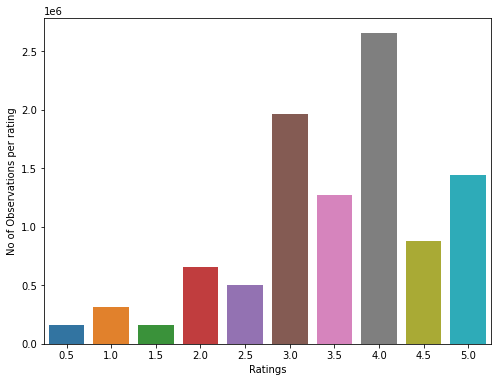

In [172]:
plt.figure(figsize=(8, 6))

sns.countplot(x='rating', data=df_train)
plt.xlabel('Ratings')
plt.ylabel('No of Observations per rating')
plt.show()

RUNNING THROUGH ENTIRE DATASETS WILL BURN OUT THE RAM, SO I'LL SUBSET AND RANDOMLY SAMPLE FROM THE MOVIES DATASET:

In [173]:
movies

,movieId,genres,title,year
0,1,Adventure,Toy Story,1995
1,1,Animation,Toy Story,1995
2,1,Children,Toy Story,1995
3,1,Comedy,Toy Story,1995
4,1,Fantasy,Toy Story,1995
...,...,...,...,...
112302,209163,Drama,Bad Poems,2018
112303,209169,(no genres listed),A Girl Thing,2001
112304,209171,Action,Women of Devil's Island,1962
112305,209171,Adventure,Women of Devil's Island,1962


In [174]:
genres = movies.groupby('genres', as_index=False)['movieId'].count()

In [175]:
genres_subset = genres[genres['movieId'] > 100]

In [176]:
genres_subset.sort_values(by='movieId',ascending=False)

,genres,movieId
8,Drama,25606
5,Comedy,16870
17,Thriller,8654
15,Romance,7719
1,Action,7348
11,Horror,5989
7,Documentary,5605
6,Crime,5319
0,(no genres listed),5062
2,Adventure,4145


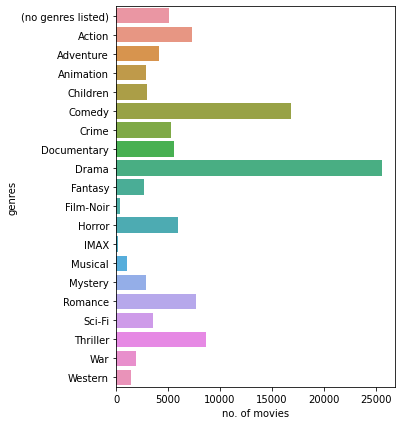

In [177]:
plt.figure(figsize=(5, 7))
sns.barplot(y='genres', x='movieId', data=genres_subset)
plt.xlabel('no. of movies')
plt.show()

UNIVARIATE ANALYSIS ON IMDB DATAFRAME:

In [178]:
imdb.shape

(27278, 11)

In [179]:
imdb.describe()

,movieId,runtime,budget,cast_size,exchange_rate,budget_USD
count,27278.000000,15189.000000,2.727800e+04,17210.000000,2.727800e+04,2.727800e+04
mean,59855.480570,100.312331,1.168478e+07,13.904126,9.967468e-01,7.373311e+06
std,44429.314697,31.061707,2.298176e+08,4.028054,1.009258e-01,6.642343e+07
min,1.000000,1.000000,0.000000e+00,1.000000,7.418037e-07,0.000000e+00
25%,6931.250000,89.000000,0.000000e+00,15.000000,1.000000e+00,0.000000e+00
50%,68068.000000,98.000000,0.000000e+00,15.000000,1.000000e+00,0.000000e+00
75%,100293.250000,109.000000,1.000000e+06,15.000000,1.000000e+00,1.000000e+06
max,131262.000000,877.000000,3.000000e+10,121.000000,1.962283e+00,7.000000e+09


RUNTIME

In [180]:
imdb['runtime'].quantile(0.99)

184.0

In [181]:
runtime_subset = imdb[imdb['runtime'] <= 184]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


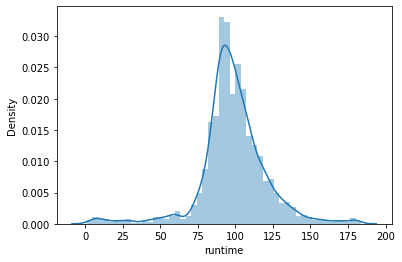

In [182]:
sns.distplot(runtime_subset['runtime'])
plt.show()

CAST_SIZE

In [183]:
np.array(imdb['cast_size'].value_counts())

array([14030,   311,   296,   276,   264,   253,   249,   205,   199,
         184,   182,   167,   163,   160,   143,    10,     9,     7,
           6,     5,     5,     5,     5,     4,     4,     4,     4,
           4,     3,     3,     3,     3,     3,     2,     2,     2,
           2,     2,     2,     2,     2,     2,     2,     2,     2,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1])

In [184]:
cast_size_subset = imdb[imdb['cast_size'] < 15]
cast_size_subset['cast_size'].value_counts()

1.0     311
14.0    296
13.0    276
12.0    264
10.0    253
11.0    249
9.0     205
8.0     199
2.0     184
6.0     182
5.0     167
3.0     163
7.0     160
4.0     143
Name: cast_size, dtype: int64

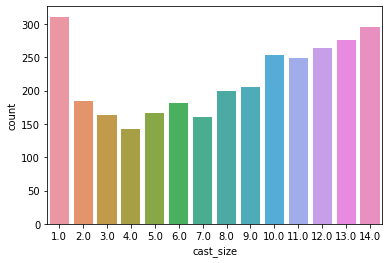

In [185]:
sns.countplot(x='cast_size', data=cast_size_subset)
plt.show()

In [186]:
imdb[imdb['cast_size'] == 1]

,movieId,title_cast,director,runtime,budget,plot_keywords,currency,cast,cast_size,exchange_rate,budget_USD
407,411,Martin Lawrence,Martin Lawrence,NaN,0,stand up|stand up comedy|live audience|spoof,USD,[Martin Lawrence],1.0,1.0,0.0
598,604,Louise Smith,C.K. Williams,73.0,0,NaN,USD,[Louise Smith],1.0,1.0,0.0
746,759,Maya Lin,Freida Lee Mock,105.0,0,vietnam war veteran|memorial|vietnam|civil rights,USD,[Maya Lin],1.0,1.0,0.0
778,791,Leopold Kozlowski,Yale Strom,85.0,0,portrait|klezmer music,USD,[Leopold Kozlowski],1.0,1.0,0.0
1084,1106,John Gielgud,Hugo Van Lawick,NaN,0,leopard|nature|narration|africa,USD,[John Gielgud],1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
27152,130638,Rainer Voss,Marc Bauder,88.0,0,banker|bail out|high rise|global economic cris...,USD,[Rainer Voss],1.0,1.0,0.0
27172,130856,Mike Scotti,Kristian Fraga,NaN,0,NaN,USD,[Mike Scotti],1.0,1.0,0.0
27181,130970,George Carlin,George Carlin,75.0,0,stand up|stand up special|tv special|social co...,USD,[George Carlin],1.0,1.0,0.0
27194,131017,Aziz Ansari,Aziz Ansari,58.0,0,stand up special|stand up comedy,USD,[Aziz Ansari],1.0,1.0,0.0


## MULTIVARIATE:

WE FIRST WISH TO get the titles of the movies that are, on average, the most highly rated, and rated the most frequently.

In [187]:
eda = pd.merge(df_movies, df_train, on='movieId', how='inner')

In [188]:
eda

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,158849,5.0,994716786
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,97203,5.0,942683155
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,161871,3.0,833104576
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,45117,4.0,1442256969
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,27431,5.0,849667827
...,...,...,...,...,...,...,...
10000033,209145,Liberté,Drama,2019,145795,1.0,1574225362
10000034,209153,Happy Flight,Comedy|Drama,2008,147040,2.5,1574232704
10000035,209159,Window of the Soul,Documentary,2001,115835,3.0,1574280985
10000036,209169,A Girl Thing,(no genres listed),2001,119571,3.0,1574291826


In [189]:
eda_movies_avg_ratings = pd.DataFrame(eda.groupby(['movieId', 'title'], as_index=False)['rating'].agg(['count', 'mean']))

eda_movies_avg_ratings.reset_index(inplace=True)

In [190]:
eda_movies_avg_ratings.sort_values(by=['count', 'mean'], ascending=False).head(25)

,movieId,title,count,mean
314,318,"Shawshank Redemption, The",32831,4.417624
351,356,Forrest Gump,32383,4.047216
292,296,Pulp Fiction,31697,4.195097
585,593,"Silence of the Lambs, The",29444,4.144172
2479,2571,"Matrix, The",29014,4.154253
257,260,Star Wars: Episode IV - A New Hope,27560,4.111811
475,480,Jurassic Park,25518,3.684634
522,527,Schindler's List,24004,4.247625
108,110,Braveheart,23722,3.994119
2866,2959,Fight Club,23536,4.227906


In [191]:
eda_movies_avg_ratings.sort_values(by=['mean', 'count'], ascending=False).head(25)

,movieId,title,count,mean
33598,159789,Marguerite & Julien,3,5.0
35398,165787,Lonesome Dove Church,3,5.0
38500,174841,Pandora's Box,3,5.0
45285,196557,Adventures of Mowgli: Return to Mankind,3,5.0
18628,99667,Excuse Me for Living,2,5.0
19372,103629,Limuzins Janu nakts krasa,2,5.0
20946,112599,Favor,2,5.0
24423,128221,Ride 'Em Cowboy,2,5.0
31168,151611,Addicted to Sexting,2,5.0
32461,155711,Underwater Love,2,5.0


In [192]:
eda_top = eda_movies_avg_ratings.sort_values(by=['count', 'mean'], ascending=False).head(500)

NOW WE HAVE A DATAFRAME CONTAINING THE TOP 500 MOVIES IN TERMS OF NUMBER OF RATINGS, WITH THE ACCOMPANYING AVERAGE RATINGS AS A SECODNARY FILTERING FEATURE:

In [193]:
eda_top = pd.merge(eda_top, imdb, on='movieId', how='inner')

In [194]:
eda_top = pd.merge(eda_top, df_movies[['movieId', 'year']], on='movieId', how='inner')

HOW DOES THE BUDGET OF THE MOST RATED MOVIES COMPARE TO THE AVERAGE BUDGET IN THE DATASET:

In [195]:
avg_budget_top = eda_top[eda_top['budget_USD'] > 0]['budget_USD'].mean()
avg_budget_top

60188745.47612575

In [196]:
avg_budget_imdb = imdb[imdb['budget'] > 0]['budget_USD'].mean()
avg_budget_imdb

25446506.378874786

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


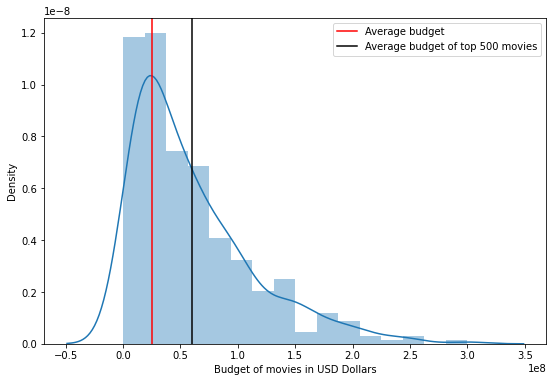

In [197]:
plt.figure(figsize=(9, 6))
sns.distplot(eda_top[eda_top['budget_USD'] > 0]['budget_USD'])
plt.axvline(x=avg_budget_imdb, color='r', label='Average budget')
plt.axvline(x=avg_budget_top, color='k', label='Average budget of top 500 movies')
plt.xlabel('Budget of movies in USD Dollars')
plt.legend()
plt.show()

HAS AVERAGE BUDGETS PER MOVIES CHANGED OVER TIME:

In [198]:
eda = pd.merge(imdb, df_movies, on='movieId', how='inner')
eda

,movieId,title_cast,director,runtime,budget,plot_keywords,currency,cast,cast_size,exchange_rate,budget_USD,title,genres,year
0,1,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",John Lasseter,81.0,30000000,toy|rivalry|cowboy|cgi animation,USD,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",15.0,1.0,30000000.0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,"Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...",Jonathan Hensleigh,104.0,65000000,board game|adventurer|fight|game,USD,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",15.0,1.0,65000000.0,Jumanji,Adventure|Children|Fantasy,1995
2,3,"Walter Matthau,Jack Lemmon,Sophia Loren,Ann-Ma...",Mark Steven Johnson,101.0,25000000,boat|lake|neighbor|rivalry,USD,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",15.0,1.0,25000000.0,Grumpier Old Men,Comedy|Romance,1995
3,4,"Whitney Houston,Angela Bassett,Loretta Devine,...",Terry McMillan,124.0,16000000,black american|husband wife relationship|betra...,USD,"[Whitney Houston, Angela Bassett, Loretta Devi...",15.0,1.0,16000000.0,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,"Steve Martin,Diane Keaton,Martin Short,Kimberl...",Albert Hackett,106.0,30000000,fatherhood|doberman|dog|mansion,USD,"[Steve Martin, Diane Keaton, Martin Short, Kim...",15.0,1.0,30000000.0,Father of the Bride Part II,Comedy,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24861,131254,"Franz Dinda,Florian Lukas,Axel Stein,Kailas Ma...",Carsten Funke,85.0,0,man wrapped in a towel|man wears a thong|male ...,USD,"[Franz Dinda, Florian Lukas, Axel Stein, Kaila...",15.0,1.0,0.0,Kein Bund für's Leben,Comedy,2007
24862,131256,"Rick Kavanian,Axel Stein,Eva Habermann,Christo...",Matthias Dinter,83.0,5800000,ski|ski resort|ampersand in title|drink in title,USD,"[Rick Kavanian, Axel Stein, Eva Habermann, Chr...",15.0,1.0,5800000.0,"Feuer, Eis & Dosenbier",Comedy,2002
24863,131258,"Nam-gil Kim,Ye-jin Son,Hae-Jin Yoo,Kyeong-yeon...",Seong-il Cheon,130.0,0,pirate|sword fight|korea|bandit,USD,"[Nam-gil Kim, Ye-jin Son, Hae-Jin Yoo, Kyeong-...",15.0,1.0,0.0,The Pirates,Adventure,2014
24864,131260,"Martti Suosalo,Ilkka Koivula,Vexi Salmi,Riitta...",Timo Koivusalo,102.0,0,friend|friendship|television show|restaurant,USD,"[Martti Suosalo, Ilkka Koivula, Vexi Salmi, Ri...",15.0,1.0,0.0,Rentun Ruusu,(no genres listed),2001


In [199]:
eda = eda.sort_values(by='year')

In [200]:
eda

,movieId,title_cast,director,runtime,budget,plot_keywords,currency,cast,cast_size,exchange_rate,budget_USD,title,genres,year
24604,129851,William K.L. Dickson,William K.L. Dickson,1.0,0,NaN,USD,[William K.L. Dickson],1.0,1.0,0.0,Dickson Greeting,(no genres listed),1891
16754,88674,NaN,NaN,NaN,0,NaN,USD,NaN,NaN,1.0,0.0,Edison Kinetoscopic Record of a Sneeze,Documentary,1894
23161,120869,NaN,NaN,NaN,0,NaN,USD,NaN,NaN,1.0,0.0,Employees Leaving the Lumière Factory,Documentary,1895
21598,113048,NaN,NaN,NaN,0,NaN,USD,NaN,NaN,1.0,0.0,Tables Turned on the Gardener,Comedy,1895
18848,98981,NaN,NaN,NaN,0,NaN,USD,NaN,NaN,1.0,0.0,"Arrival of a Train, The",Documentary,1896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24380,128734,"Tymon Tymanski,Robert Brylewski,Grzegorz Halam...",Tymon Tymanski,93.0,0,NaN,USD,"[Tymon Tymanski, Robert Brylewski, Grzegorz Ha...",15.0,1.0,0.0,Polskie gówno,Comedy|Musical,NaN
24552,129651,"Tony Call,Dan Bittner,Geoffrey Cantor,Eliza Fo...",Tony Call,NaN,0,hitler|plan gone wrong|patriotism|nationalism,USD,"[Tony Call, Dan Bittner, Geoffrey Cantor, Eliz...",12.0,1.0,0.0,The Third Reich: The Rise & Fall,(no genres listed),NaN
24563,129705,NaN,David Sampliner,82.0,0,three word title|unemployment,USD,NaN,NaN,1.0,0.0,My Own Man,(no genres listed),NaN
24616,129887,"Marley Shelton,Samantha Shelton,Misha Collins,...",Christopher Shelton,85.0,0,NaN,USD,"[Marley Shelton, Samantha Shelton, Misha Colli...",9.0,1.0,0.0,Moving Alan,(no genres listed),NaN


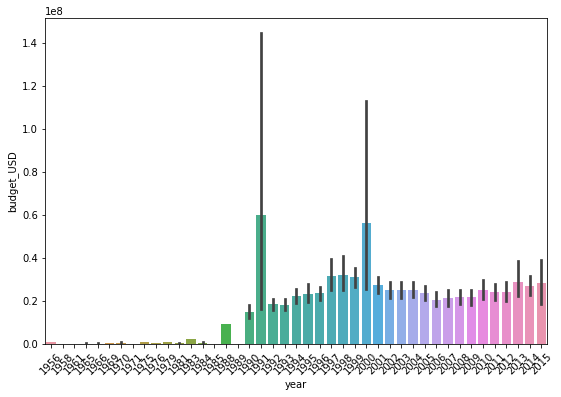

In [201]:
plt.figure(figsize=(9, 6))
sns.barplot(x='year', y='budget_USD', data=eda[eda['budget_USD'] > 0])
plt.xticks(rotation=45)
plt.show()

the two years, 1991 and 2000, have the largest average budgets in the dataset. It is possible though, that one movie in 1991, as well as one movie in 2000 contain an extra zero in their allocated budgets.

In [202]:
eda[eda['year'] == '1991']['budget_USD'].max()

5000000000.0

In [203]:
eda[eda['year'] == '2000']['budget_USD'].max()

7000000000.0

ASSESING NUMBER OF RATINGS PER PER MOVIE RELASE YEAR: I.E. ARE THERE CERTAIN YEARS CONTAINING CLASSICS WHICH ARE RATED REGULARLY, OR ARE MOVIES THAT HAVE BEEN RELEASED MORE RECENTLY, RATED HIGHLY:

In [204]:
eda = pd.merge(df_movies, df_train, how='inner', on='movieId')
eda

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,158849,5.0,994716786
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,97203,5.0,942683155
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,161871,3.0,833104576
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,45117,4.0,1442256969
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,27431,5.0,849667827
...,...,...,...,...,...,...,...
10000033,209145,Liberté,Drama,2019,145795,1.0,1574225362
10000034,209153,Happy Flight,Comedy|Drama,2008,147040,2.5,1574232704
10000035,209159,Window of the Soul,Documentary,2001,115835,3.0,1574280985
10000036,209169,A Girl Thing,(no genres listed),2001,119571,3.0,1574291826


In [205]:
eda.year.value_counts()

1995    598412
1994    521621
1999    450391
1996    444231
2000    386359
         ...  
25           2
1874         2
101          1
3            1
5            1
Name: year, Length: 143, dtype: int64

In [206]:
eda = pd.DataFrame(eda.groupby('year', as_index=False)['rating'].agg(['mean', 'count']))

In [207]:
eda.reset_index(inplace=True)

In [208]:
eda_count = eda[eda['count'] >= 10000]

In [209]:
eda_count

,year,mean,count
54,1937,3.647545,11122
56,1939,3.855305,23356
57,1940,3.791605,22906
58,1941,3.925212,20919
59,1942,3.956835,18916
...,...,...,...
133,2015,3.564361,117610
134,2016,3.531155,91991
135,2017,3.537717,68112
136,2018,3.459774,39278


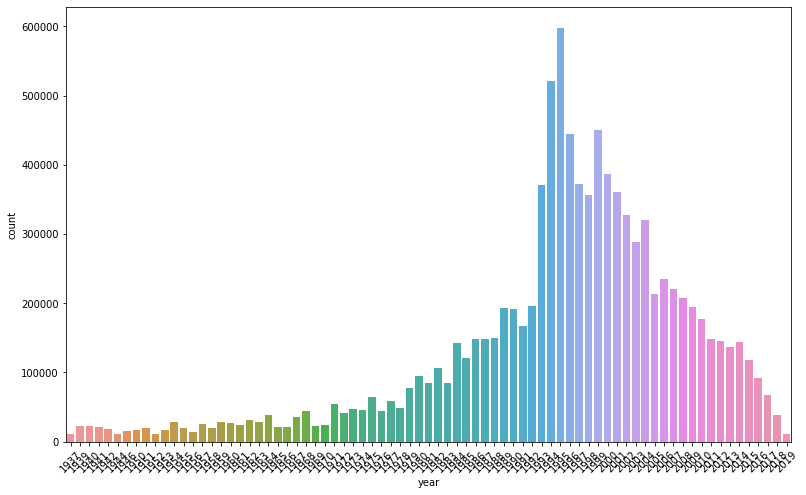

In [210]:
plt.figure(figsize=(13, 8))
sns.barplot(x='year', y='count', data=eda_count)
plt.xticks(rotation=45)
plt.show()

Definite peak around the mid-90s:

Is there any change in the average ratings per year of movie releases over time:

In [211]:
eda['mean'].describe()

count    143.000000
mean       3.465576
std        0.494389
min        1.541667
25%        3.327012
50%        3.564361
75%        3.786979
max        5.000000
Name: mean, dtype: float64

In [212]:
eda_count['mean'].describe()

count    77.000000
mean      3.657157
std       0.178538
min       3.311928
25%       3.508451
50%       3.647545
75%       3.817681
max       3.999444
Name: mean, dtype: float64

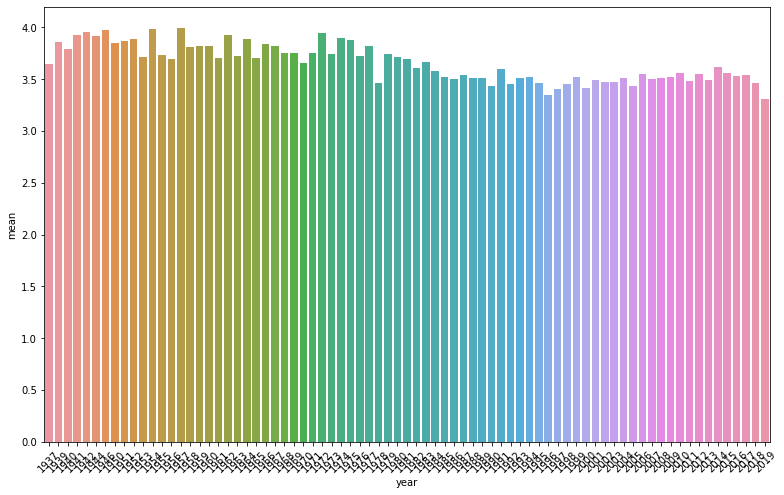

In [213]:
plt.figure(figsize=(13, 8))
sns.barplot(x='year', y='mean', data=eda_count)
plt.xticks(rotation=45)
plt.show()

In [214]:
eda_top.drop(['title_cast', 'plot_keywords', 'currency', 'cast_size', 'exchange_rate', 'budget'], axis=1,  inplace=True) # NB don't run again!

In [215]:
eda_top

,movieId,title,count,mean,director,runtime,cast,budget_USD,year
0,318,"Shawshank Redemption, The",32831,4.417624,Stephen King,142.0,"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",25000000.0,1994
1,356,Forrest Gump,32383,4.047216,Winston Groom,142.0,"[Tom Hanks, Rebecca Williams, Sally Field, Mic...",55000000.0,1994
2,296,Pulp Fiction,31697,4.195097,Quentin Tarantino,154.0,"[Tim Roth, Amanda Plummer, Laura Lovelace, Joh...",8000000.0,1994
3,593,"Silence of the Lambs, The",29444,4.144172,Thomas Harris,118.0,"[Jodie Foster, Lawrence A. Bonney, Kasi Lemmon...",19000000.0,1991
4,2571,"Matrix, The",29014,4.154253,Lilly Wachowski,136.0,"[Keanu Reeves, Laurence Fishburne, Carrie-Anne...",63000000.0,1999
...,...,...,...,...,...,...,...,...,...
489,59369,Taken,4512,3.734375,Luc Besson,90.0,"[Liam Neeson, Maggie Grace, Leland Orser, Jon ...",25000000.0,2008
490,2100,Splash,4493,3.225907,NaN,NaN,NaN,0.0,1984
491,1262,"Great Escape, The",4487,4.103298,NaN,NaN,NaN,0.0,1963
492,6537,Terminator 3: Rise of the Machines,4484,3.054639,John Brancato,109.0,"[Arnold Schwarzenegger, Nick Stahl, Claire Dan...",200000000.0,2003


In [216]:
eda_top = eda_top.sort_values('year')

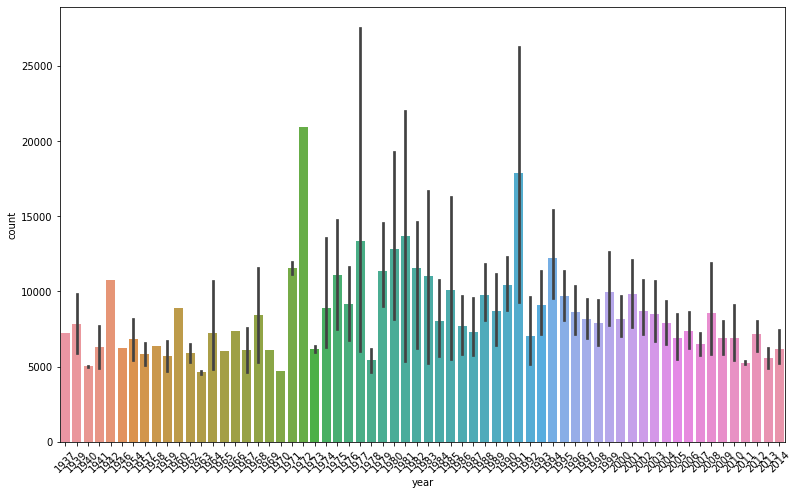

In [217]:
plt.figure(figsize=(13, 8))
sns.barplot(x='year', y='count', data=eda_top, estimator=np.mean)
plt.xticks(rotation=45)
plt.show()


In [218]:
eda_top[eda_top['year'] == '1972']

,movieId,title,count,mean,director,runtime,cast,budget_USD,year
18,858,"Godfather, The",20960,4.311355,NaN,NaN,NaN,0.0,1972


In [219]:
eda_top[eda_top['year'] == '1991']

,movieId,title,count,mean,director,runtime,cast,budget_USD,year
10,589,Terminator 2: Judgment Day,23075,3.951419,James Cameron,137.0,"[Arnold Schwarzenegger, Linda Hamilton, Edward...",102000000.0,1991
460,3418,Thelma & Louise,4698,3.589613,Callie Khouri,130.0,"[Susan Sarandon, Geena Davis, Harvey Keitel, M...",16500000.0,1991
56,595,Beauty and the Beast,14237,3.674756,Kirk Wise,84.0,"[Robby Benson, Jesse Corti, Rex Everhart, Ange...",25000000.0,1991
3,593,"Silence of the Lambs, The",29444,4.144172,Thomas Harris,118.0,"[Jodie Foster, Lawrence A. Bonney, Kasi Lemmon...",19000000.0,1991


RATINGS AND NUMBER OF RATINGS PER GENRES:

In [220]:
eda = pd.merge(movies, df_train, on='movieId', how='inner')
eda

,movieId,genres,title,year,userId,rating,timestamp
0,1,Adventure,Toy Story,1995,158849,5.0,994716786
1,1,Adventure,Toy Story,1995,97203,5.0,942683155
2,1,Adventure,Toy Story,1995,161871,3.0,833104576
3,1,Adventure,Toy Story,1995,45117,4.0,1442256969
4,1,Adventure,Toy Story,1995,27431,5.0,849667827
...,...,...,...,...,...,...,...
27120039,209159,Documentary,Window of the Soul,2001,115835,3.0,1574280985
27120040,209169,(no genres listed),A Girl Thing,2001,119571,3.0,1574291826
27120041,209171,Action,Women of Devil's Island,1962,119571,3.0,1574291937
27120042,209171,Adventure,Women of Devil's Island,1962,119571,3.0,1574291937


In [221]:
eda = pd.DataFrame(eda.groupby('genres', as_index=False)['rating'].agg(['count', 'mean']))

In [222]:
eda.reset_index(inplace=True)

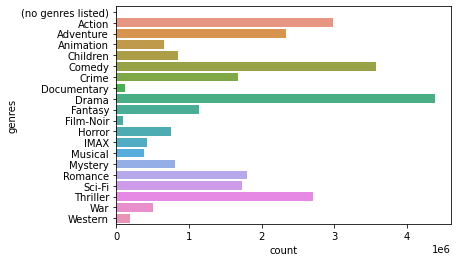

In [223]:
sns.barplot(x='count', y='genres', data=eda)

plt.show()

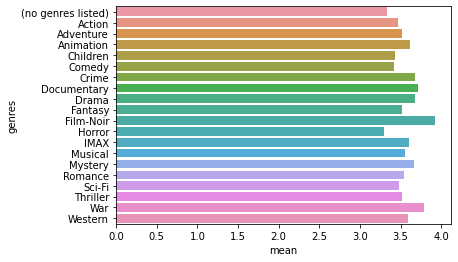

In [224]:
sns.barplot(x='mean', y='genres', data=eda)
plt.show()

ASSESSING HOW MOST POPULAR GENRES HAVE EVOLVED OVER TIME:

In [225]:
popular_genres = ['Comedy', 'Drama', 'Thriller', 'Romance', 'Action', 'Crime', 'Sci-fi', 'Western', 'Animation']
genres = []

for genre in movies.genres:
  if genre in popular_genres:
    genres.append(genre)

  else:
    genres.append(np.nan)

movies['genres'] = genres

In [226]:
movies = movies.dropna()

In [227]:
movies

,movieId,genres,title,year
1,1,Animation,Toy Story,1995
3,1,Comedy,Toy Story,1995
8,3,Comedy,Grumpier Old Men,1995
9,3,Romance,Grumpier Old Men,1995
10,4,Comedy,Waiting to Exhale,1995
...,...,...,...,...
112299,209157,Drama,We,2018
112301,209163,Comedy,Bad Poems,2018
112302,209163,Drama,Bad Poems,2018
112304,209171,Action,Women of Devil's Island,1962


In [228]:
movies.groupby(['genres', 'year'], as_index=False)['movieId'].count()

,genres,year,movieId
0,Action,1891,1
1,Action,1897,1
2,Action,1900,1
3,Action,1901,1
4,Action,1902,1
...,...,...,...
899,Western,2015,14
900,Western,2016,15
901,Western,2017,15
902,Western,2018,16


In [229]:
genres_grouped = movies.groupby(['year', 'genres'], as_index=False)['movieId'].count()

In [230]:
genres_grouped

,year,genres,movieId
0,1,Comedy,1
1,1890,Comedy,1
2,1891,Action,1
3,1892,Animation,1
4,1894,Comedy,3
...,...,...,...
899,2019,Romance,70
900,2019,Thriller,178
901,2019,Western,7
902,38,Animation,1


In [231]:
genres_grouped = genres_grouped[genres_grouped['movieId'] > 1]

In [232]:
genres_2010s = genres_grouped[(genres_grouped['year'] <= '2020') & (genres_grouped['year'] >= '2010')]
genres_2010s

,year,genres,movieId
822,2010,Action,212
823,2010,Animation,91
824,2010,Comedy,459
825,2010,Crime,118
826,2010,Drama,719
...,...,...,...
897,2019,Crime,74
898,2019,Drama,387
899,2019,Romance,70
900,2019,Thriller,178


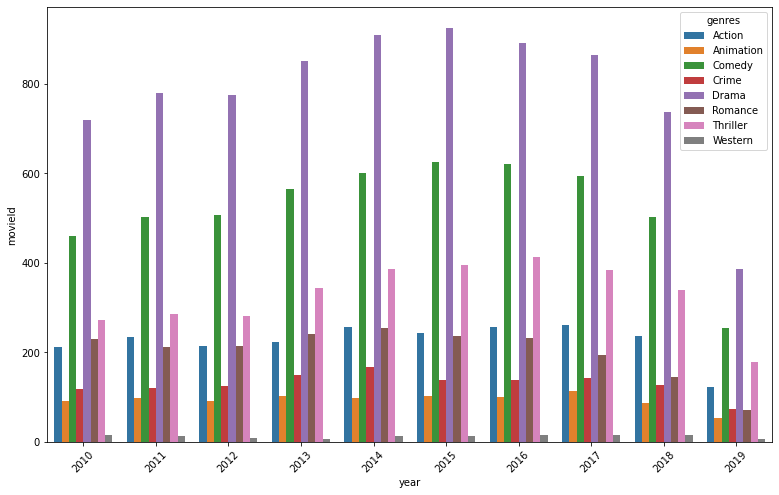

In [233]:
plt.figure(figsize=(13, 8))
sns.barplot(x='year', y='movieId', data=genres_2010s, hue='genres')
plt.xticks(rotation=45)
plt.show()

In [234]:
genres_1980s = genres_grouped[(genres_grouped['year'] < '1990') & (genres_grouped['year'] >= '1980')]
genres_1980s

,year,genres,movieId
581,1980,Action,68
582,1980,Animation,10
583,1980,Comedy,139
584,1980,Crime,31
585,1980,Drama,160
...,...,...,...
654,1989,Comedy,188
655,1989,Crime,49
656,1989,Drama,222
657,1989,Romance,49


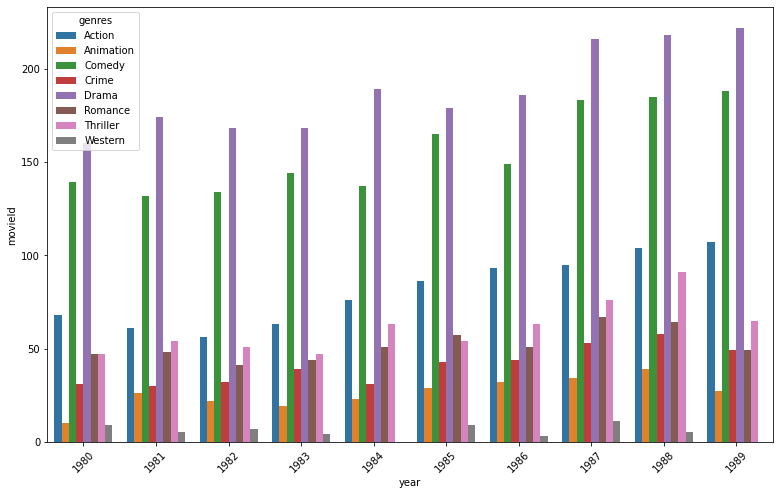

In [235]:
plt.figure(figsize=(13, 8))
sns.barplot(x='year', y='movieId', data=genres_1980s, hue='genres')
plt.xticks(rotation=45)
plt.show()

In [236]:
between_wars = genres_grouped[(genres_grouped['year'] >= '1920') & (genres_grouped['year'] <= '1939')]
between_wars

,year,genres,movieId
110,1920,Comedy,15
111,1920,Crime,2
112,1920,Drama,16
113,1920,Romance,6
114,1920,Western,4
...,...,...,...
256,1939,Crime,39
257,1939,Drama,98
258,1939,Romance,51
259,1939,Thriller,21


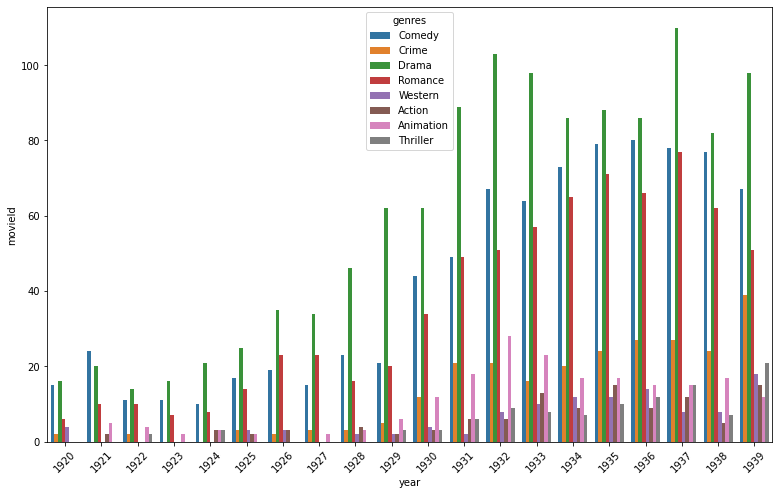

In [237]:
plt.figure(figsize=(13, 8))
sns.barplot(x='year', y='movieId', hue='genres', data=between_wars)
plt.xticks(rotation=45)
plt.show()

DIRECTORS:

In [238]:
eda = pd.merge(imdb, df_train, how='inner', on='movieId')

In [239]:
eda = pd.merge(eda, df_movies, how='inner', on='movieId')

In [240]:
eda

,movieId,title_cast,director,runtime,budget,plot_keywords,currency,cast,cast_size,exchange_rate,budget_USD,userId,rating,timestamp,title,genres,year
0,1,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",John Lasseter,81.0,30000000,toy|rivalry|cowboy|cgi animation,USD,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",15.0,1.0,30000000.0,158849,5.0,994716786,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,1,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",John Lasseter,81.0,30000000,toy|rivalry|cowboy|cgi animation,USD,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",15.0,1.0,30000000.0,97203,5.0,942683155,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
2,1,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",John Lasseter,81.0,30000000,toy|rivalry|cowboy|cgi animation,USD,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",15.0,1.0,30000000.0,161871,3.0,833104576,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
3,1,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",John Lasseter,81.0,30000000,toy|rivalry|cowboy|cgi animation,USD,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",15.0,1.0,30000000.0,45117,4.0,1442256969,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
4,1,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...",John Lasseter,81.0,30000000,toy|rivalry|cowboy|cgi animation,USD,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",15.0,1.0,30000000.0,27431,5.0,849667827,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9633026,131262,"Sophie Lane Curtis,Kelly Reilly,Graham Phillip...",Hilary Brougher,96.0,0,hex|witch|virgin|blood,USD,"[Sophie Lane Curtis, Kelly Reilly, Graham Phil...",15.0,1.0,0.0,33844,2.5,1436135246,Innocence,Adventure|Fantasy|Horror,2014
9633027,131262,"Sophie Lane Curtis,Kelly Reilly,Graham Phillip...",Hilary Brougher,96.0,0,hex|witch|virgin|blood,USD,"[Sophie Lane Curtis, Kelly Reilly, Graham Phil...",15.0,1.0,0.0,51278,3.0,1434134840,Innocence,Adventure|Fantasy|Horror,2014
9633028,131262,"Sophie Lane Curtis,Kelly Reilly,Graham Phillip...",Hilary Brougher,96.0,0,hex|witch|virgin|blood,USD,"[Sophie Lane Curtis, Kelly Reilly, Graham Phil...",15.0,1.0,0.0,73268,1.0,1475289253,Innocence,Adventure|Fantasy|Horror,2014
9633029,131262,"Sophie Lane Curtis,Kelly Reilly,Graham Phillip...",Hilary Brougher,96.0,0,hex|witch|virgin|blood,USD,"[Sophie Lane Curtis, Kelly Reilly, Graham Phil...",15.0,1.0,0.0,7865,1.0,1456452588,Innocence,Adventure|Fantasy|Horror,2014


In [241]:
directors = pd.DataFrame(eda.groupby(['director'], as_index=False)['rating'].agg(['mean', 'count']))

In [242]:
directors.reset_index(inplace=True)

In [243]:
directors.sort_values(by=['count', 'mean'], ascending=False).head(25)

,director,mean,count
7572,Quentin Tarantino,3.936571,109919
6385,Michael Crichton,3.273370,65157
3762,J.R.R. Tolkien,4.080118,62963
5652,Lilly Wachowski,3.808348,60988
8770,Stephen King,4.049956,59903
2811,Ethan Coen,3.947250,51185
3856,James Cameron,3.687102,51178
5732,Luc Besson,3.749676,44015
4779,Jonathan Nolan,4.100516,42645
9181,Thomas Harris,3.989774,36425


In [244]:
Tarantino = pd.DataFrame(eda[eda['director'] == "Quentin Tarantino"].groupby(['title', 'budget_USD', 'title_cast', 'genres', 'year'])['rating'].count())

In [245]:
Tarantino

,,,,,rating
title,budget_USD,title_cast,genres,year,
Death Proof,0.0,"Kurt Russell,Zoë Bell,Rosario Dawson,Vanessa Ferlito,Sydney Tamiia Poitier,Tracie Thoms,Rose McGowan,Jordan Ladd,Mary Elizabeth Winstead,Quentin Tarantino,Marcy Harriell,Eli Roth,Omar Doom,Michael Bacall,Monica Staggs",Action|Adventure|Crime|Horror|Thriller,2007,1793
Django Unchained,100000000.0,"Jamie Foxx,Christoph Waltz,Leonardo DiCaprio,Kerry Washington,Samuel L. Jackson,Walton Goggins,Dennis Christopher,James Remar,David Steen,Dana Gourrier,Nichole Galicia,Laura Cayouette,Ato Essandoh,Sammi Rotibi,Clay Donahue Fontenot",Action|Drama|Western,2012,8193
Inglourious Basterds,70000000.0,"Brad Pitt,Mélanie Laurent,Christoph Waltz,Eli Roth,Michael Fassbender,Diane Kruger,Daniel Brühl,Til Schweiger,Gedeon Burkhard,Jacky Ido,B.J. Novak,Omar Doom,August Diehl,Denis Ménochet,Sylvester Groth",Action|Drama|War,2009,9272
Jackie Brown,12000000.0,"Pam Grier,Samuel L. Jackson,Robert Forster,Bridget Fonda,Michael Keaton,Robert De Niro,Michael Bowen,Chris Tucker,LisaGay Hamilton,Tommy 'Tiny' Lister,Hattie Winston,Sid Haig,Aimee Graham,Ellis Williams,Tangie Ambrose",Crime|Drama|Thriller,1997,4893
Kill Bill: Vol. 1,30000000.0,"Uma Thurman,Lucy Liu,Vivica A. Fox,Daryl Hannah,David Carradine,Michael Madsen,Julie Dreyfus,Chiaki Kuriyama,Shin'ichi Chiba,Chia-Hui Liu,Michael Parks,Michael Bowen,Jun Kunimura,Kenji Ohba,Yuki Kazamatsuri",Action|Crime|Thriller,2003,13400
Kill Bill: Vol. 2,30000000.0,"Vivica A. Fox,Ambrosia Kelley,Michael Parks,James Parks,Jonathan Loughran,Michael Bowen,Kenji Ohba,Yoshiyuki Morishita,Jun Kunimura,Goro Daimon,Kazuki Kitamura,Akaji Maro,Shun Sugata,Sachiko Fujii,Ronnie Yoshiko Fujiyama",Action|Drama|Thriller,2004,11408
Natural Born Killers,34000000.0,"Woody Harrelson,Juliette Lewis,Tom Sizemore,Rodney Dangerfield,Everett Quinton,Jared Harris,Pruitt Taylor Vince,Edie McClurg,Russell Means,Lanny Flaherty,O-Lan Jones,Robert Downey Jr.,Richard Lineback,Kirk Baltz,Ed White",Action|Crime|Thriller,1994,9208
Pulp Fiction,8000000.0,"Tim Roth,Amanda Plummer,Laura Lovelace,John Travolta,Samuel L. Jackson,Phil LaMarr,Frank Whaley,Burr Steers,Bruce Willis,Ving Rhames,Paul Calderon,Bronagh Gallagher,Rosanna Arquette,Eric Stoltz,Uma Thurman",Comedy|Crime|Drama|Thriller,1994,31697
Reservoir Dogs,1200000.0,"Harvey Keitel,Tim Roth,Michael Madsen,Chris Penn,Steve Buscemi,Lawrence Tierney,Randy Brooks,Kirk Baltz,Edward Bunker,Quentin Tarantino,Rich Turner,David Steen,Tony Cosmo,Stevo Polyi,Michael Sottile",Crime|Mystery|Thriller,1992,13998


In [246]:
imdb_movies = pd.merge(imdb, df_movies, on='movieId', how='inner')

In [247]:
imdb_movies.drop(['runtime', 'budget', 'currency', 'cast', 'cast_size', 'exchange_rate'], axis=1, inplace=True)

In [248]:
Tarantino = imdb_movies[imdb_movies['director'] == "Quentin Tarantino"]
Tarantino

,movieId,title_cast,director,plot_keywords,budget_USD,title,genres,year
285,288,"Woody Harrelson,Juliette Lewis,Tom Sizemore,Ro...",Quentin Tarantino,media|satire|controversy|woman on top,34000000.0,Natural Born Killers,Action|Crime|Thriller,1994
292,296,"Tim Roth,Amanda Plummer,Laura Lovelace,John Tr...",Quentin Tarantino,nonlinear timeline|overdose|drug overdose|bondage,8000000.0,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994
549,555,"Christian Slater,Patricia Arquette,Dennis Hopp...",Quentin Tarantino,drugs|cocaine|pimp|aspiring actor,13000000.0,True Romance,Crime|Thriller,1993
1062,1089,"Harvey Keitel,Tim Roth,Michael Madsen,Chris Pe...",Quentin Tarantino,heist gone wrong|nonlinear timeline|robbery|gr...,1200000.0,Reservoir Dogs,Crime|Mystery|Thriller,1992
1663,1729,"Pam Grier,Samuel L. Jackson,Robert Forster,Bri...",Quentin Tarantino,money|gun|flight attendant|gun dealer,12000000.0,Jackie Brown,Crime|Drama|Thriller,1997
6750,6874,"Uma Thurman,Lucy Liu,Vivica A. Fox,Daryl Hanna...",Quentin Tarantino,revenge|bride|sword|female protagonist,30000000.0,Kill Bill: Vol. 1,Action|Crime|Thriller,2003
7298,7438,"Vivica A. Fox,Ambrosia Kelley,Michael Parks,Ja...",Quentin Tarantino,bride|vengeance|female assassin|martial arts,30000000.0,Kill Bill: Vol. 2,Action|Drama|Thriller,2004
11624,53519,"Kurt Russell,Zoë Bell,Rosario Dawson,Vanessa F...",Quentin Tarantino,camera shot of a woman's bare feet|psychopath|...,0.0,Death Proof,Action|Adventure|Crime|Horror|Thriller,2007
13215,68157,"Brad Pitt,Mélanie Laurent,Christoph Waltz,Eli ...",Quentin Tarantino,revenge|nazi hunter|world war two|nazi,70000000.0,Inglourious Basterds,Action|Drama|War,2009
18879,99114,"Jamie Foxx,Christoph Waltz,Leonardo DiCaprio,K...",Quentin Tarantino,racial vengeance|racial violence|historically ...,100000000.0,Django Unchained,Action|Drama|Western,2012


In [249]:
Cameron = imdb_movies[imdb_movies['director'] == "James Cameron"]
Cameron

,movieId,title_cast,director,plot_keywords,budget_USD,title,genres,year
196,198,"Ralph Fiennes,Angela Bassett,Juliette Lewis,To...",James Cameron,cyberpunk|virtual reality|murder|rape,42000000.0,Strange Days,Action|Crime|Drama|Mystery|Sci-Fi|Thriller,1995
581,589,"Arnold Schwarzenegger,Linda Hamilton,Edward Fu...",James Cameron,time travel|liquid metal|future|sequel,102000000.0,Terminator 2: Judgment Day,Action|Sci-Fi,1991
1655,1721,"Leonardo DiCaprio,Kate Winslet,Billy Zane,Kath...",James Cameron,iceberg|sailor's death|wet|wetness,200000000.0,Titanic,Drama|Romance,1997
14054,72998,"Sam Worthington,Zoe Saldana,Sigourney Weaver,S...",James Cameron,spiritualism|paraplegic|marine|future,237000000.0,Avatar,Action|Adventure|Sci-Fi|IMAX,2009


In [250]:
Wachowski = imdb_movies[imdb_movies['director'] == "Lilly Wachowski"]
Wachowski

,movieId,title_cast,director,plot_keywords,budget_USD,title,genres,year
22,23,"Sylvester Stallone,Antonio Banderas,Julianne M...",Lilly Wachowski,assassin|rival|assassination|computer hacker,50000000.0,Assassins,Action|Crime|Thriller,1995
847,866,"Jennifer Tilly,Gina Gershon,Joe Pantoliano,Joh...",Lilly Wachowski,lesbian|mafia|stolen money|ex convict,4500000.0,Bound,Crime|Drama|Romance|Thriller,1996
2479,2571,"Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...",Lilly Wachowski,simulated reality|artificial reality|war with ...,63000000.0,"Matrix, The",Action|Sci-Fi|Thriller,1999
6246,6365,"Ray Anthony,Christine Anu,Andy Arness,Alima As...",Lilly Wachowski,oracle|cult film|prophecy|alternate reality,150000000.0,"Matrix Reloaded, The",Action|Adventure|Sci-Fi|Thriller|IMAX,2003
6808,6934,"Mary Alice,Tanveer K. Atwal,Helmut Bakaitis,Ka...",Lilly Wachowski,2200s|good versus evil|villain|male protagonist,150000000.0,"Matrix Revolutions, The",Action|Adventure|Sci-Fi|Thriller|IMAX,2003
10661,44191,"Natalie Portman,Hugo Weaving,Stephen Rea,Steph...",Lilly Wachowski,fascist|revolution|right wing government|freedom,54000000.0,V for Vendetta,Action|Sci-Fi|Thriller|IMAX,2006
12258,59037,"Emile Hirsch,Nicholas Elia,Susan Sarandon,Meli...",Lilly Wachowski,based on cartoon|gadget car|conspiracy|based o...,120000000.0,Speed Racer,Action|Children|Sci-Fi|IMAX,2008
21654,113345,"Mila Kunis,Channing Tatum,Sean Bean,Eddie Redm...",Lilly Wachowski,space opera|bees|planet earth|planet,176000000.0,Jupiter Ascending,Action|Adventure|Sci-Fi,2015


In [251]:
Coen = imdb_movies[imdb_movies['director'] == "Ethan Coen"]
Coen

,movieId,title_cast,director,plot_keywords,budget_USD,title,genres,year
466,471,"Tim Robbins,Jennifer Jason Leigh,Paul Newman,C...",Ethan Coen,art deco|reference to oklahoma the stage music...,40000000.0,"Hudsucker Proxy, The",Comedy,1994
600,608,"William H. Macy,Steve Buscemi,Peter Stormare,K...",Ethan Coen,black comedy|botched crime|neo noir|americana,7000000.0,Fargo,Comedy|Crime|Drama|Thriller,1996
1212,1245,"Gabriel Byrne,Marcia Gay Harden,John Turturro,...",Ethan Coen,irish mob|loyalty|organized crime|betrayal,14000000.0,Miller's Crossing,Crime|Drama|Film-Noir|Thriller,1990
1666,1732,"Jeff Bridges,John Goodman,Julianne Moore,Steve...",Ethan Coen,rug|nihilism|pornographer|bowling alley,15000000.0,"Big Lebowski, The",Comedy|Crime,1998
3922,4027,"George Clooney,John Turturro,Tim Blake Nelson,...",Ethan Coen,greek mythology|slapstick comedy|odysseus|neo ...,26000000.0,"O Brother, Where Art Thou?",Adventure|Comedy|Crime,2000
4774,4881,"Billy Bob Thornton,Frances McDormand,Michael B...",Ethan Coen,neo noir|chain smoking|santa rosa california|p...,20000000.0,"Man Who Wasn't There, The",Crime|Drama,2001
6317,6440,"John Turturro,John Goodman,Judy Davis,Michael ...",Ethan Coen,writer's block|magical realism|film industry|k...,9000000.0,Barton Fink,Drama|Thriller,1991
6749,6873,"George Clooney,Catherine Zeta-Jones,Geoffrey R...",Ethan Coen,reference to henry viii|woman wears eyeglasses...,60000000.0,Intolerable Cruelty,Comedy|Romance,2003
